In [1]:
from astropy.table import join,Table,Column,vstack
import numpy as np
fpath='./data/sersic_cat.fits'
dat=Table.read(fpath) 
dat.info('stats')

<Table length=4108149>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47089e+12 3.96273e+16 3.96373e+16
                    Z    0.213792     0.10445   0.0020084    0.599994
                NTILE     1.86554    0.885065           1           4
                TILES          --          --          --          --
                   RA      192.38       87.78 0.000108207         360
                  DEC     19.5092     22.9455    -19.4334     79.2584
         flux_g_dered     26.2202     90.6276    0.551198     9795.15
         flux_r_dered     58.0583     180.615     15.2757     15512.8
         flux_z_dered     102.474     307.526           0     28272.6
        flux_w1_dered     98.8664     225.314 0.000158545       26891
        flux_w2_dered     68.6786     148.677    -12123.4       32890
         REST_GMR_0P1    0.755825     0.20803   -0.224542     1.459

In [2]:
import catalogue_analysis as ca
import colour_lookup as col
import numpy as np
from astropy.table import join,Table,Column,vstack
#Specify regions to loop over
regions=('S','N')

#Specify data release  Y1/Y3

Y3=True

dat.remove_columns(['zmin','zmax','vmin','vmax','v'])
datfull=dat

#Random sample and apply all cuts from the start for a quick run through
Sel=ca.selection('N')# import North selection cuts  
smaskN= (datfull['Z'] > Sel['zmin']) & (datfull['Z'] < Sel['zmax']) & (np.random.rand(datfull['Z'].size)<Sel['f_ran'])\
& (datfull['rmag'] < Sel['faint'])  & (datfull['rmag'] > Sel['bright']) & (datfull['reg']=='N') 
Sel=ca.selection('S') # import South selection cuts    
smaskS= (datfull['Z'] > Sel['zmin']) & (datfull['Z'] < Sel['zmax']) &(np.random.rand(datfull['Z'].size)<Sel['f_ran']) \
& (datfull['rmag'] < Sel['faint'])  & (datfull['rmag'] > Sel['bright']) & (datfull['reg']=='S')
smask= np.logical_or(smaskN,smaskS) #True for objects making cuts in North or South
dat=datfull[smask]    
print('South sample size:',smaskS.sum())
print('North sample size:',smaskN.sum())
dat.info('stats') 
    




South sample size: 2870770
North sample size: 1208362
<Table length=4079132>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47109e+12 3.96273e+16 3.96373e+16
                    Z    0.212077    0.101576   0.0100012    0.499997
                NTILE     1.86569     0.88512           1           4
                TILES          --          --          --          --
                   RA     192.391     87.7807 0.000108207         360
                  DEC     19.5162     22.9444    -19.4334     79.2584
         flux_g_dered     25.9755      85.117    0.551198     8082.15
         flux_r_dered     57.7048     172.445     15.2757     15381.2
         flux_z_dered     101.998     296.587           0     28272.6
        flux_w1_dered     98.3776     220.111 0.000158545       26891
        flux_w2_dered     68.4445     145.545    -12123.4       32890
         REST

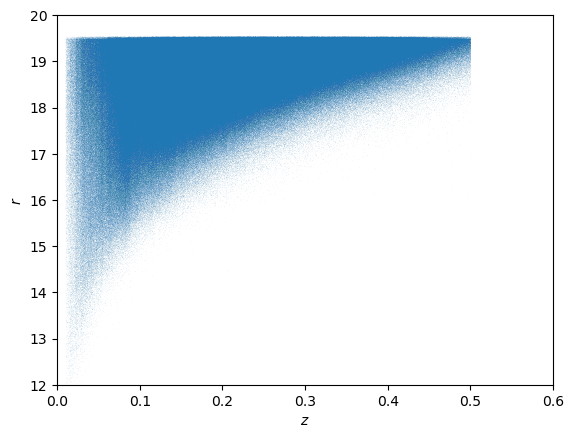

In [3]:
#sky plot
#ca.sky_plot(dat,regions)
import matplotlib.pyplot as plt
plt.scatter(dat['Z'],dat['rmag'], marker='.' , linewidths=0,s=0.25,alpha=0.2)
plt.ylim([12,20])
plt.xlim([0.0,0.6])
plt.xlabel('$z$')
plt.ylabel('$r$')
plt.show()

<Table length=4079132>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47109e+12 3.96273e+16 3.96373e+16
                    Z    0.212077    0.101576   0.0100012    0.499997
                NTILE     1.86569     0.88512           1           4
                TILES          --          --          --          --
                   RA     192.391     87.7807 0.000108207         360
                  DEC     19.5162     22.9444    -19.4334     79.2584
         flux_g_dered     25.9755      85.117    0.551198     8082.15
         flux_r_dered     57.7048     172.445     15.2757     15381.2
         flux_z_dered     101.998     296.587           0     28272.6
        flux_w1_dered     98.3776     220.111 0.000158545       26891
        flux_w2_dered     68.4445     145.545    -12123.4       32890
         REST_GMR_0P1    0.756074     0.20772   -0.224542     1.459

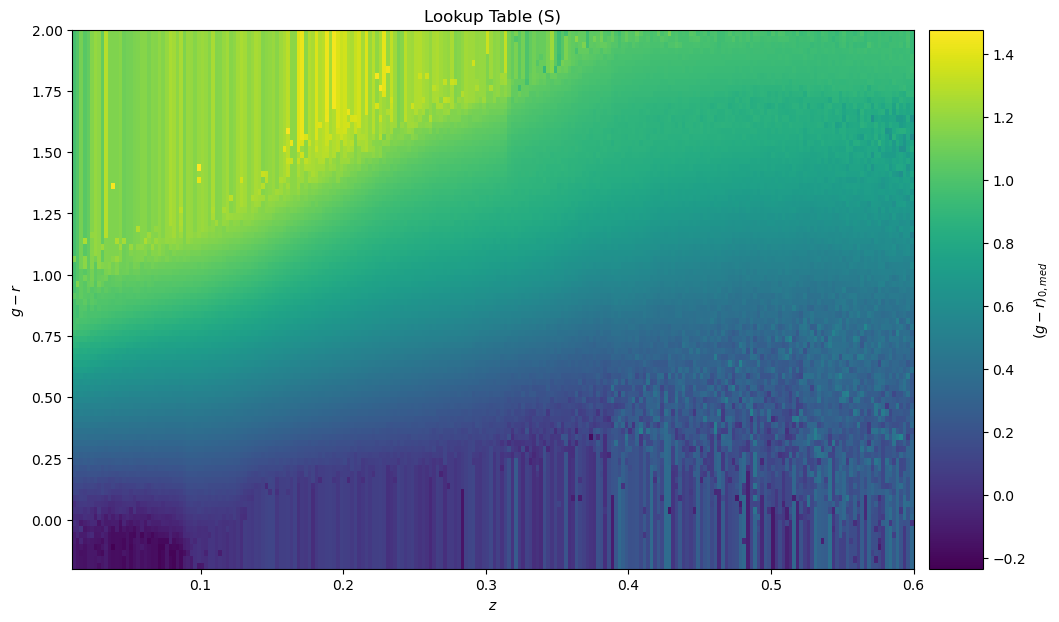

REST-FRAME COLOURS ASSIGNED.
starting region  N
nx,ny: 235 199
LOADING IN LOOKUP TABLE.


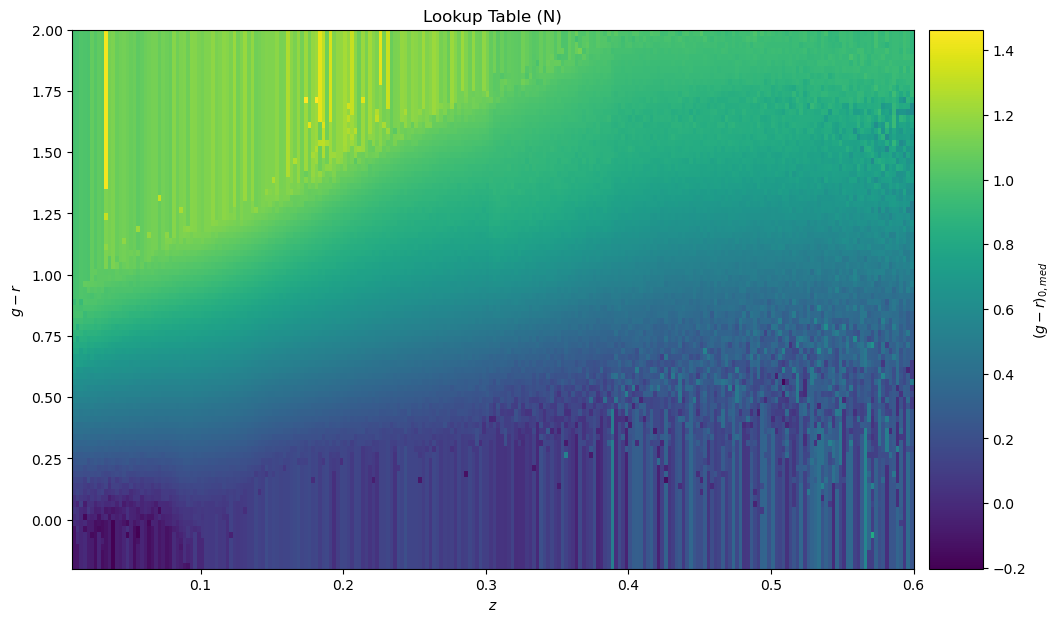

REST-FRAME COLOURS ASSIGNED.
<Table length=4079132>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47109e+12 3.96273e+16 3.96373e+16
                    Z    0.212077    0.101576   0.0100012    0.499997
                NTILE     1.86569     0.88512           1           4
                TILES          --          --          --          --
                   RA     192.391     87.7807 0.000108207         360
                  DEC     19.5162     22.9444    -19.4334     79.2584
         flux_g_dered     25.9755      85.117    0.551198     8082.15
         flux_r_dered     57.7048     172.445     15.2757     15381.2
         flux_z_dered     101.998     296.587           0     28272.6
        flux_w1_dered     98.3776     220.111 0.000158545       26891
        flux_w2_dered     68.4445     145.545    -12123.4       32890
         REST_GMR_0P1    0.756075    0

In [4]:
# Compute rest frame colours and absolute magnitudes using precomputed k-corrections and the Evolution parameter specified in catalogue_analysis.selection()
# If fresh=True then the k-ccorections are recomputed using John Moustakas's Fast Spec Catalogue which is used to fit k-corrections
fresh=False
if fresh: 
    fsf=ca.read_fsf('data/fastspec-iron-main-bright.fits')
else :
    fsf='null'
    
#compute rest frame colours and absolute magnitudes using k-corrections computed from the fsf catalogue
dat.info('stats')
ca.recompute_rest_col_mag(dat,regions,fsf,fresh=fresh,test_plots=False)
dat.info('stats')

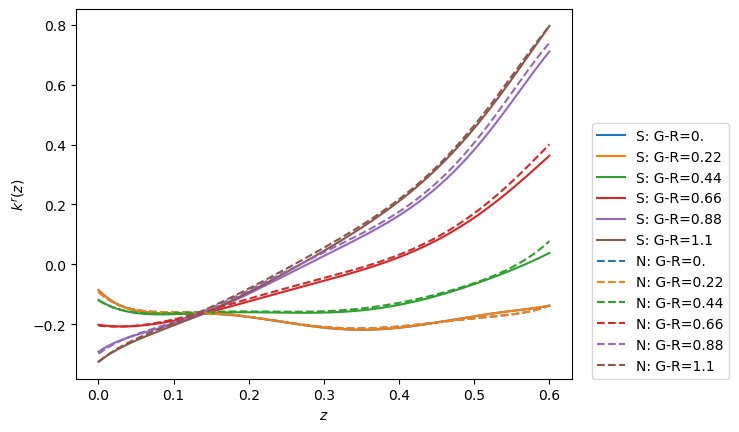

Using healpix map with NSIDE=32 and pixel area 3.357 sq.deg.


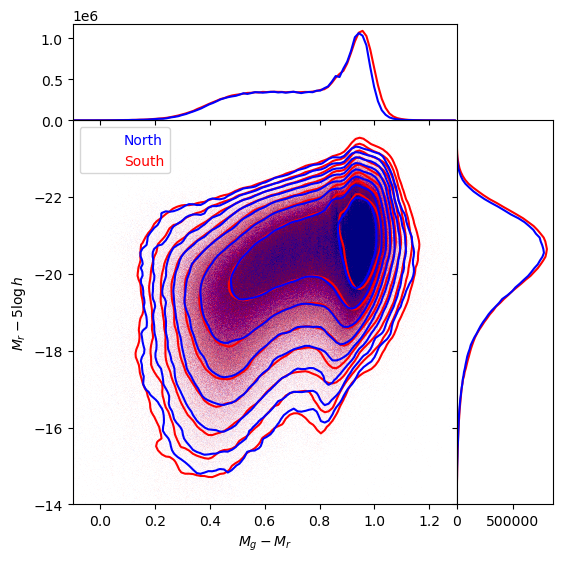

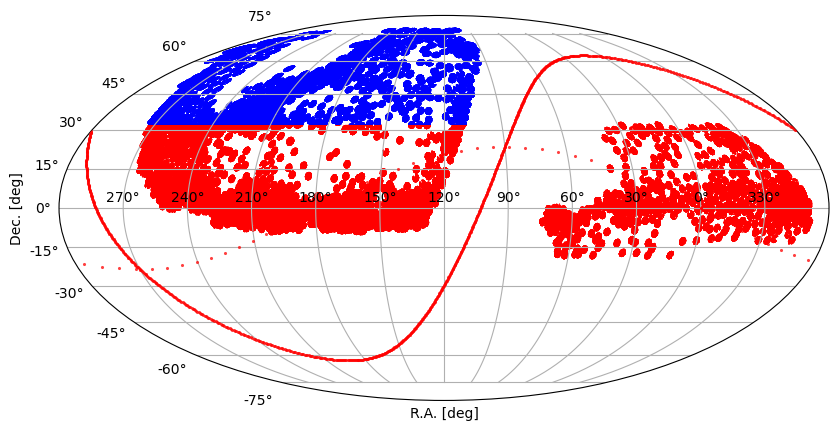

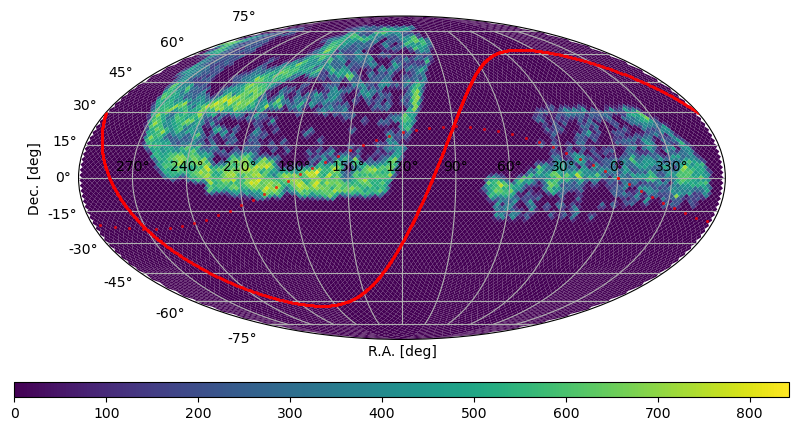

In [5]:
# Make a few basic QA plots

#Plot k-corrections to check they are well behaved
ca.plot_kcorr(regions)
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#sky plot
ca.sky_plot(dat,regions)

starting region  S
root_itp2: maximum number of iterations required= 18
iteration 1 : 2790712  not yet converged
iteration 2 : 2790708  not yet converged
iteration 3 : 2789616  not yet converged
iteration 4 : 2500257  not yet converged
iteration 5 : 677560  not yet converged
iteration 6 : 122357  not yet converged
iteration 7 : 36117  not yet converged
iteration 8 : 15514  not yet converged
iteration 9 : 6596  not yet converged
iteration 10 : 3898  not yet converged
iteration 11 : 2464  not yet converged
iteration 12 : 1575  not yet converged
iteration 13 : 1087  not yet converged
iteration 14 : 740  not yet converged
iteration 15 : 517  not yet converged
iteration 16 : 369  not yet converged
iteration 17 : 105  not yet converged
iteration 18 : 0  not yet converged
zmax values found
reversing some bracketing values so that yb>ya in all cases
root_itp2: maximum number of iterations required= 18
iteration 1 : 67635  not yet converged
iteration 2 : 67635  not yet converged
iteration 3 : 6

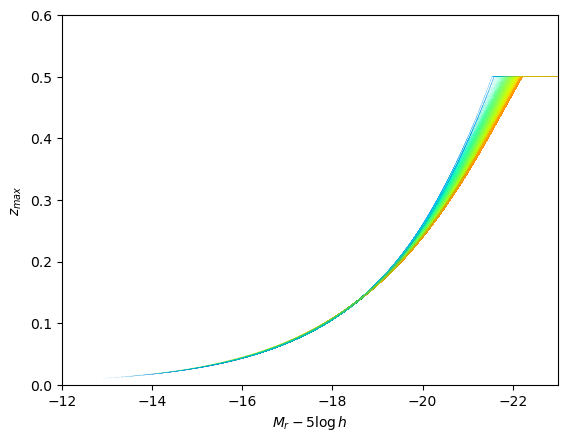

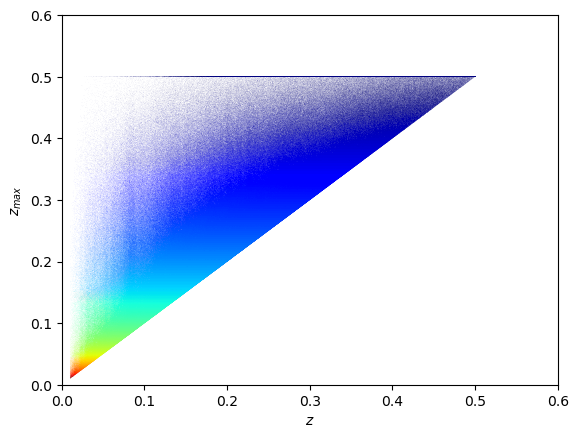

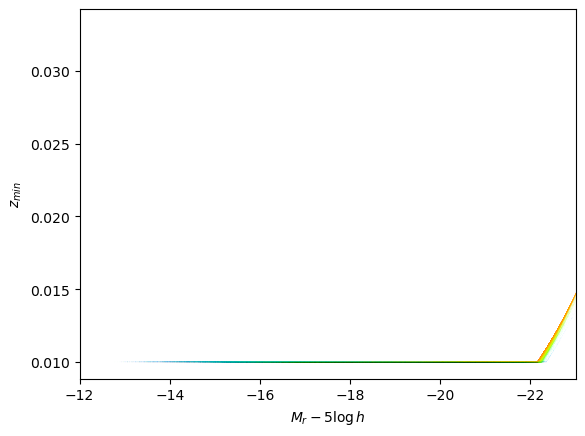

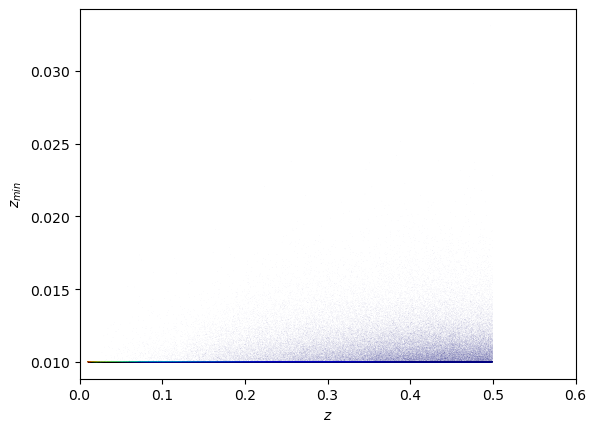

In [6]:
# Compute zmax and vmax values
ca.compute_zmax_vmax(dat,regions)

#Plots of how zmax depends on absolute magnitude, colour and redshift
ca.plot_zmax_absmag(dat)
ca.plot_zmax_z(dat)
#Plots of how zmin depends on absolute magnitude, colour and redshift
ca.plot_zmin_absmag(dat)
ca.plot_zmin_z(dat)

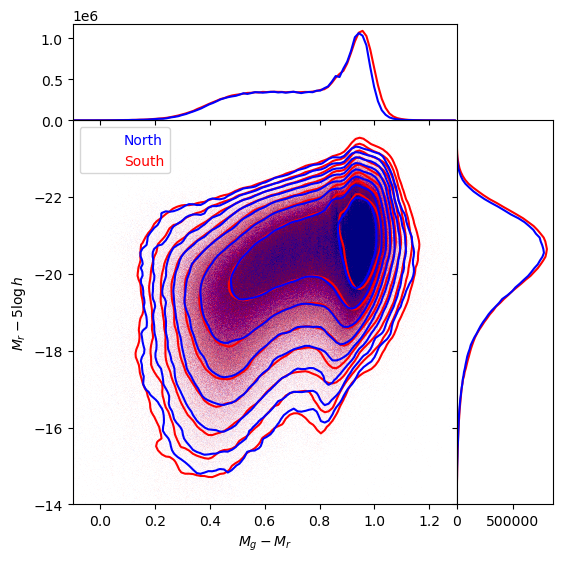

In [7]:
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#ca.plot_col_mag_withvmax(dat,regions)

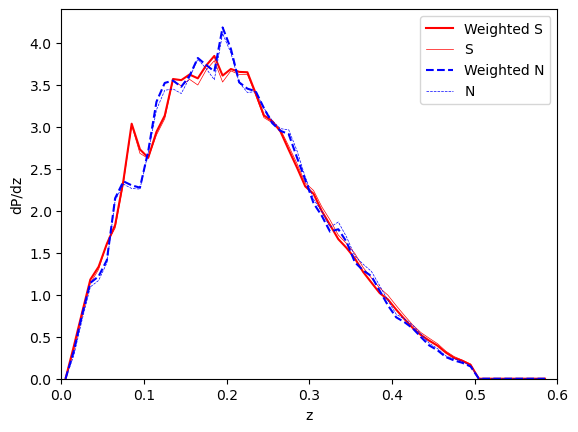

In [8]:
#redshift distribution
ca.hist_nz(dat,regions)

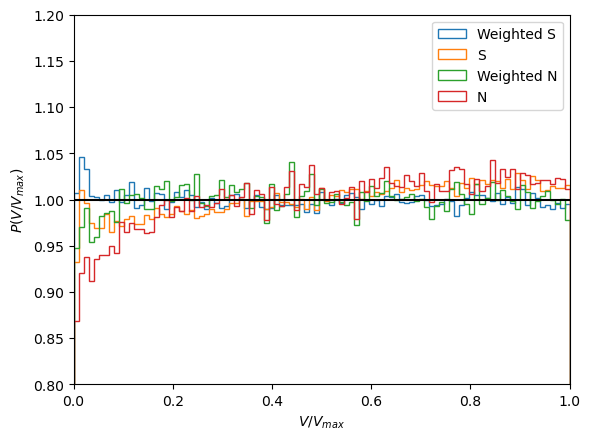

In [9]:
#Plot overall V/Vmax distribution
ca.plot_v_vmax(dat,regions)

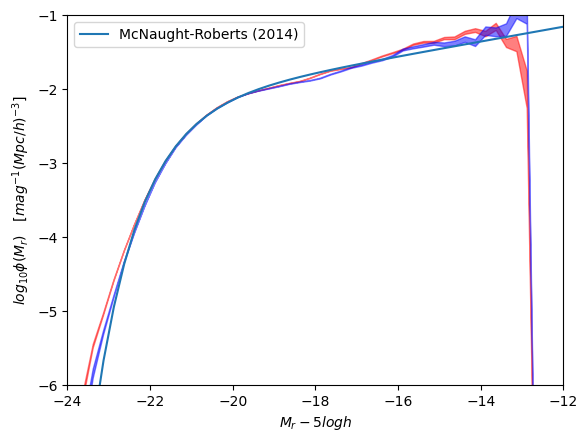

In [10]:
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(dat,regions,ratio=False)

In [11]:
# Petrosian Radii and Flux Ratios
#
import numpy as np
from scipy.special import gammainc, gamma
from scipy.optimize import fsolve
# Solves for the parameter xp that is related to the Petrosian radius as described in
# https://www.overleaf.com/read/npcktptmbqtf#747974 
#
# Define the function to solve
def equation_to_solve(x, n):
    # Ensure x is positive to avoid undefined behaviour
    if x <= 0:
        return np.inf
    # The integral is the lower incomplete gamma function
    integral = gamma(2 * n) * gammainc(2 * n, x)  # gammainc gives the normalized incomplete gamma
    lhs = 0.2* 2.0* n * (x ** (-2 * n)) * np.exp(x) * integral  # LHS of the equation
    # The 0.2 above is the choice made by SDSS (see Blanton et al 2001)
    return lhs - 1.0  # The equation we want to solve


# Function to evaluate the ratio Petrosian to total flux as described in
# https://www.overleaf.com/read/npcktptmbqtf#747974 
#
def flux_ratio(xmax, n):
    # Numerator: lower incomplete Gamma function
    ratio = gammainc(2 * n, xmax)
    return ratio

x0=4.0 #initial guess for xp
ntab=np.linspace(0.2, 6.0, num=60)
delta_tab=np.zeros(ntab.size)
for i in range(0,ntab.size):
    n=ntab[i]
    xp=fsolve(equation_to_solve, x0, args=(n,))
    rp=xp**n    # relationship between xp and the Petrosian radius rp
    rmax=2.0*rp # The factor 2.0 is choice made by SDSS (see Blanton et al 2001)
    xmax=rmax**(1/n) # Convert back to x for which the flux ratio is a standard function
    x0=xp  #update guess
    fratio = flux_ratio(xmax, n)  # Petrosian flux ratio
    delta_tab[i]=-2.5*np.log10(fratio[0])
    
print(ntab)
print(delta_tab)
               
print("n_sersic      flux_ratio   Delta_Mag")
# Loop over values of Sersic index n
for i in range(1, 60):
    n=0.2 + 0.1*(i-1)

    # Initial guess for xp
    x0 = 4.0  # Starting point for numerical solver
    # Solve using fsolve to find xp
    xp = fsolve(equation_to_solve, x0, args=(n,))
    rp=xp**n    # relationship between xp and the Petrosian radius rp
    rmax=2.0*rp # The factor 2.0 is choice made by SDSS (see Blanton et al 2001)
    xmax=rmax**(1/n) # Convert back to x for which the flux ratio is a standard function

    fratio = flux_ratio(xmax, n)  # Petrosian flux ratio
    print(f"{n:.1f}      &         {fratio[0]:.3f}   &  {-2.5*np.log10(fratio[0]):.3f} \\\\")

    #print(f"n:{n} xp:{xp} fratio:{fratio} at root:{equation_to_solve(xp, n)}")



[0.2        0.29830508 0.39661017 0.49491525 0.59322034 0.69152542
 0.78983051 0.88813559 0.98644068 1.08474576 1.18305085 1.28135593
 1.37966102 1.4779661  1.57627119 1.67457627 1.77288136 1.87118644
 1.96949153 2.06779661 2.16610169 2.26440678 2.36271186 2.46101695
 2.55932203 2.65762712 2.7559322  2.85423729 2.95254237 3.05084746
 3.14915254 3.24745763 3.34576271 3.4440678  3.54237288 3.64067797
 3.73898305 3.83728814 3.93559322 4.03389831 4.13220339 4.23050847
 4.32881356 4.42711864 4.52542373 4.62372881 4.7220339  4.82033898
 4.91864407 5.01694915 5.11525424 5.21355932 5.31186441 5.41016949
 5.50847458 5.60677966 5.70508475 5.80338983 5.90169492 6.        ]
[-0.00000000e+00  2.05818822e-11  4.03984843e-07  2.25005382e-05
  1.92629168e-04  7.33303043e-04  1.83444980e-03  3.59236644e-03
  6.02296585e-03  9.09330265e-03  1.27468772e-02  1.69192820e-02
  2.15466502e-02  2.65696929e-02  3.19352764e-02  3.75967157e-02
  4.35134471e-02  4.96504386e-02  5.59775233e-02  6.24687477e-02
  6.

In [12]:
dat['rmag']=dat['rmag']+np.interp(dat['SERSIC'],ntab,delta_tab)
dat['ABSMAG_RP1']=dat['rmag']+np.interp(dat['SERSIC'],ntab,delta_tab)

In [13]:

dat.remove_columns(['zmin','zmax','vmin','vmax','v'])
datfull=dat

#Random sample and apply all cuts from the start for a quick run through
Sel=ca.selection('N')# import North selection cuts  
smaskN= (datfull['Z'] > Sel['zmin']) & (datfull['Z'] < Sel['zmax']) & (np.random.rand(datfull['Z'].size)<Sel['f_ran'])\
& (datfull['rmag'] < Sel['faint'])  & (datfull['rmag'] > Sel['bright']) & (datfull['reg']=='N') 
Sel=ca.selection('S') # import South selection cuts    
smaskS= (datfull['Z'] > Sel['zmin']) & (datfull['Z'] < Sel['zmax']) &(np.random.rand(datfull['Z'].size)<Sel['f_ran']) \
& (datfull['rmag'] < Sel['faint'])  & (datfull['rmag'] > Sel['bright']) & (datfull['reg']=='S')
smask= np.logical_or(smaskN,smaskS) #True for objects making cuts in North or South
dat=datfull[smask]    
print('South sample size:',smaskS.sum())
print('North sample size:',smaskN.sum())
dat.info('stats') 
    




South sample size: 2623597
North sample size: 1104057
<Table length=3727654>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47085e+12 3.96273e+16 3.96373e+16
                    Z    0.202432   0.0969274   0.0100012    0.499994
                NTILE     1.86561    0.885054           1           4
                TILES          --          --          --          --
                   RA      192.47     87.7518 0.000108207         360
                  DEC     19.5414     22.9449    -19.4334     79.2584
         flux_g_dered     27.9458     88.7842    0.606059     8082.15
         flux_r_dered     61.5005     179.927     15.2768     15381.2
         flux_z_dered     108.187     309.531           0     28272.6
        flux_w1_dered     102.808     229.654 0.000572697       26891
        flux_w2_dered     71.6162     151.747    -12123.4       32890
         REST

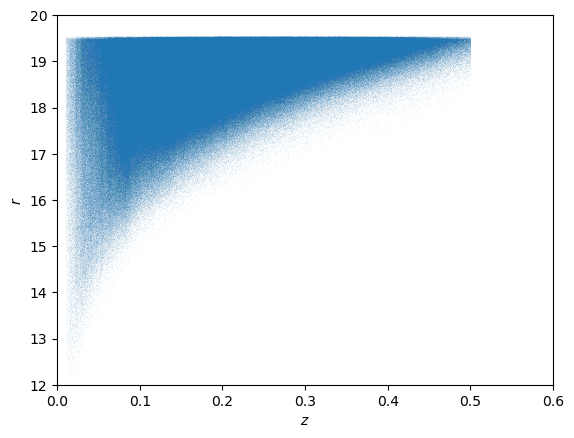

In [14]:
#sky plot
#ca.sky_plot(dat,regions)
import matplotlib.pyplot as plt
plt.scatter(dat['Z'],dat['rmag'], marker='.' , linewidths=0,s=0.25,alpha=0.2)
plt.ylim([12,20])
plt.xlim([0.0,0.6])
plt.xlabel('$z$')
plt.ylabel('$r$')
plt.show()

<Table length=3727654>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47085e+12 3.96273e+16 3.96373e+16
                    Z    0.202432   0.0969274   0.0100012    0.499994
                NTILE     1.86561    0.885054           1           4
                TILES          --          --          --          --
                   RA      192.47     87.7518 0.000108207         360
                  DEC     19.5414     22.9449    -19.4334     79.2584
         flux_g_dered     27.9458     88.7842    0.606059     8082.15
         flux_r_dered     61.5005     179.927     15.2768     15381.2
         flux_z_dered     108.187     309.531           0     28272.6
        flux_w1_dered     102.808     229.654 0.000572697       26891
        flux_w2_dered     71.6162     151.747    -12123.4       32890
         REST_GMR_0P1    0.745377    0.209259   -0.224542     1.459

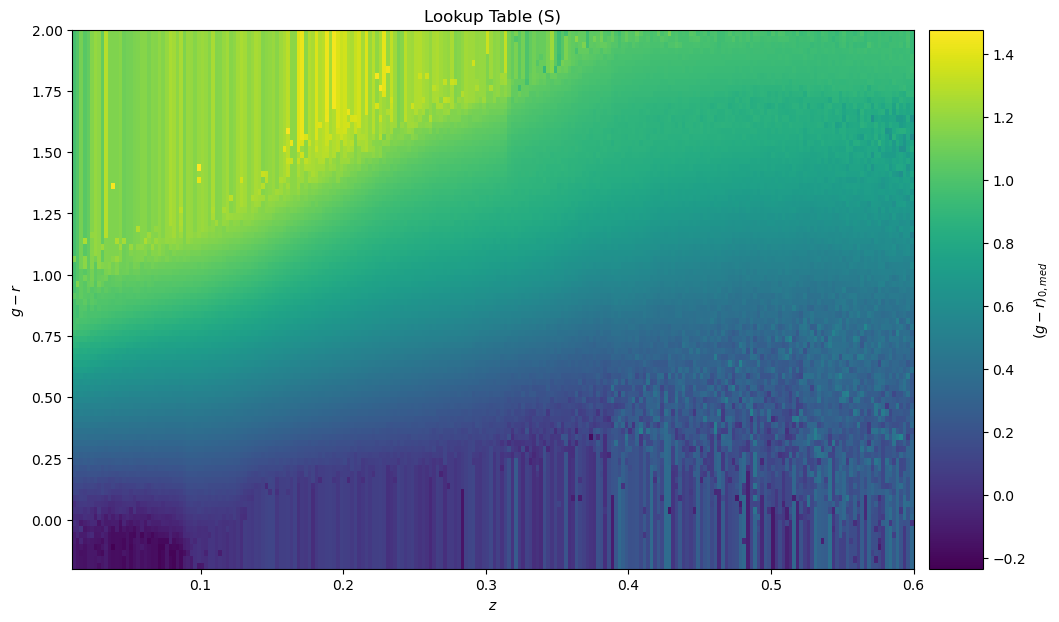

REST-FRAME COLOURS ASSIGNED.
starting region  N
nx,ny: 235 199
LOADING IN LOOKUP TABLE.


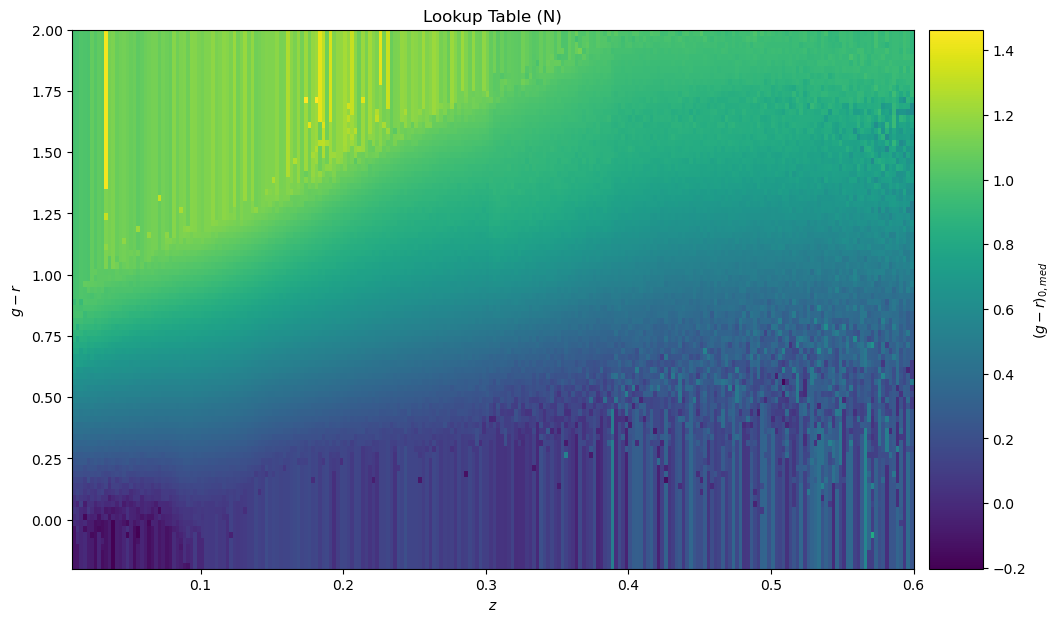

REST-FRAME COLOURS ASSIGNED.
<Table length=3727654>
         name             mean        std         min         max    
--------------------- ----------- ----------- ----------- -----------
             TARGETID 3.96296e+16 2.47085e+12 3.96273e+16 3.96373e+16
                    Z    0.202432   0.0969274   0.0100012    0.499994
                NTILE     1.86561    0.885054           1           4
                TILES          --          --          --          --
                   RA      192.47     87.7518 0.000108207         360
                  DEC     19.5414     22.9449    -19.4334     79.2584
         flux_g_dered     27.9458     88.7842    0.606059     8082.15
         flux_r_dered     61.5005     179.927     15.2768     15381.2
         flux_z_dered     108.187     309.531           0     28272.6
        flux_w1_dered     102.808     229.654 0.000572697       26891
        flux_w2_dered     71.6162     151.747    -12123.4       32890
         REST_GMR_0P1    0.745377    0

In [15]:
# Compute rest frame colours and absolute magnitudes using precomputed k-corrections and the Evolution parameter specified in catalogue_analysis.selection()
# If fresh=True then the k-ccorections are recomputed using John Moustakas's Fast Spec Catalogue which is used to fit k-corrections
fresh=False
if fresh: 
    fsf=ca.read_fsf('data/fastspec-iron-main-bright.fits')
else :
    fsf='null'
    
#compute rest frame colours and absolute magnitudes using k-corrections computed from the fsf catalogue
dat.info('stats')
ca.recompute_rest_col_mag(dat,regions,fsf,fresh=fresh,test_plots=False)
dat.info('stats')

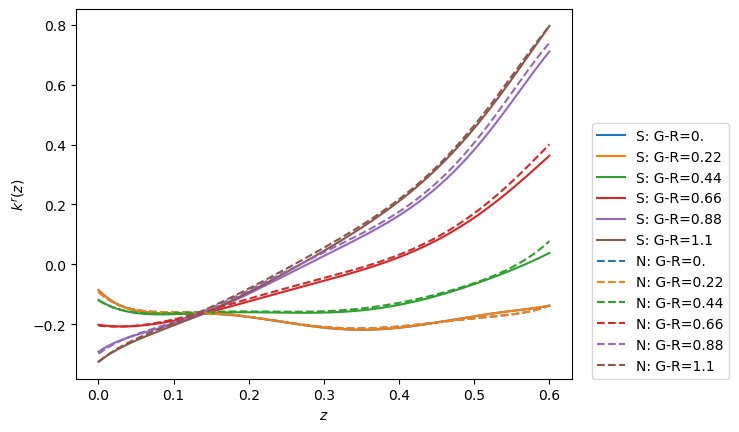

Using healpix map with NSIDE=32 and pixel area 3.357 sq.deg.


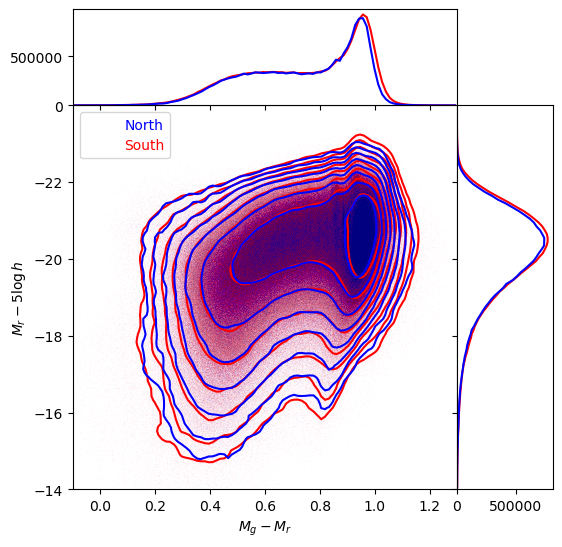

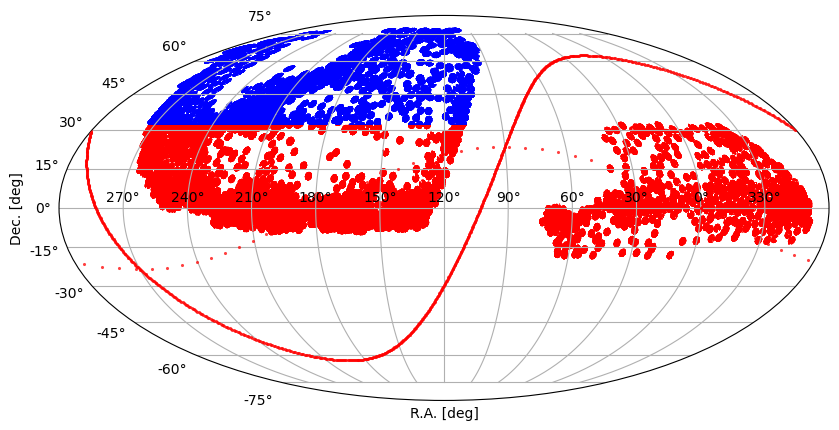

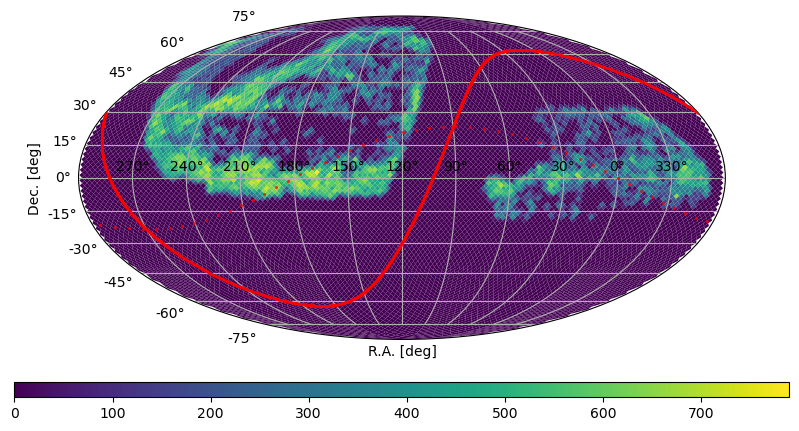

In [16]:
# Make a few basic QA plots

#Plot k-corrections to check they are well behaved
ca.plot_kcorr(regions)
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#sky plot
ca.sky_plot(dat,regions)

starting region  S
root_itp2: maximum number of iterations required= 18
iteration 1 : 2587180  not yet converged
iteration 2 : 2587177  not yet converged
iteration 3 : 2586209  not yet converged
iteration 4 : 2310108  not yet converged
iteration 5 : 683220  not yet converged
iteration 6 : 122390  not yet converged
iteration 7 : 36146  not yet converged
iteration 8 : 15558  not yet converged
iteration 9 : 6558  not yet converged
iteration 10 : 3889  not yet converged
iteration 11 : 2457  not yet converged
iteration 12 : 1594  not yet converged
iteration 13 : 1091  not yet converged
iteration 14 : 764  not yet converged
iteration 15 : 537  not yet converged
iteration 16 : 376  not yet converged
iteration 17 : 112  not yet converged
iteration 18 : 0  not yet converged
zmax values found
reversing some bracketing values so that yb>ya in all cases
root_itp2: maximum number of iterations required= 18
iteration 1 : 26801  not yet converged
iteration 2 : 26801  not yet converged
iteration 3 : 2

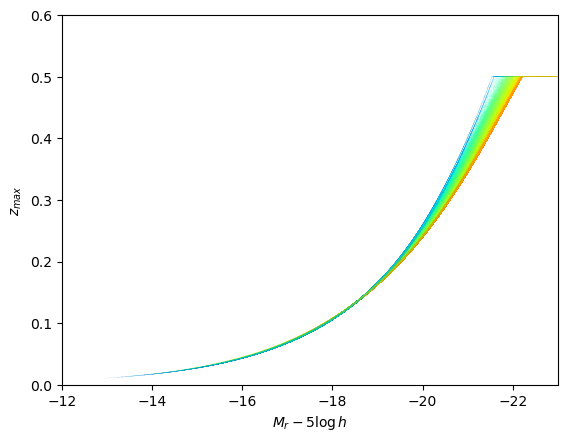

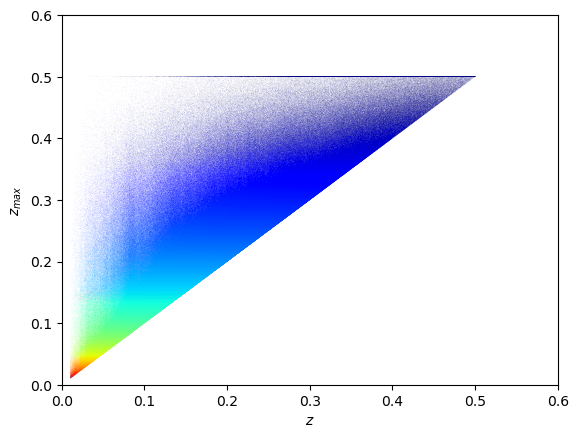

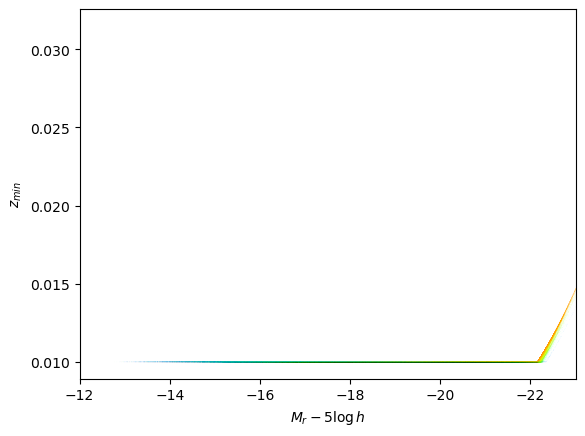

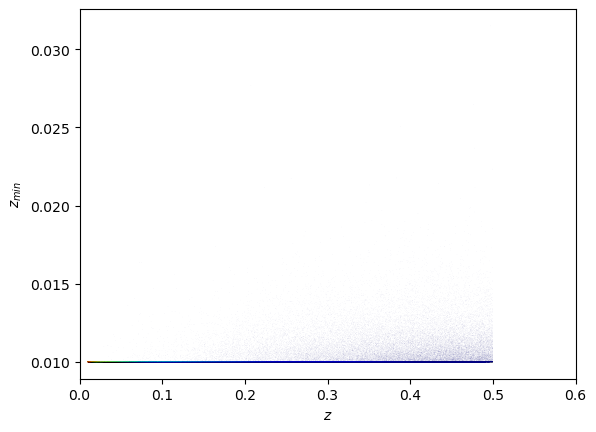

In [17]:
# Compute zmax and vmax values
ca.compute_zmax_vmax(dat,regions)

#Plots of how zmax depends on absolute magnitude, colour and redshift
ca.plot_zmax_absmag(dat)
ca.plot_zmax_z(dat)
#Plots of how zmin depends on absolute magnitude, colour and redshift
ca.plot_zmin_absmag(dat)
ca.plot_zmin_z(dat)

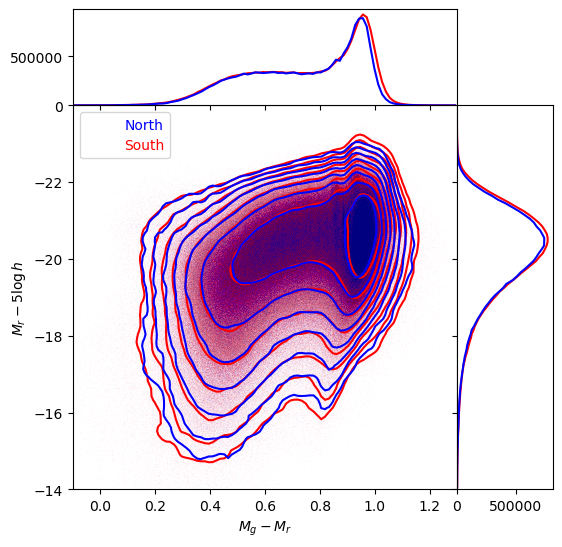

In [18]:
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#ca.plot_col_mag_withvmax(dat,regions)

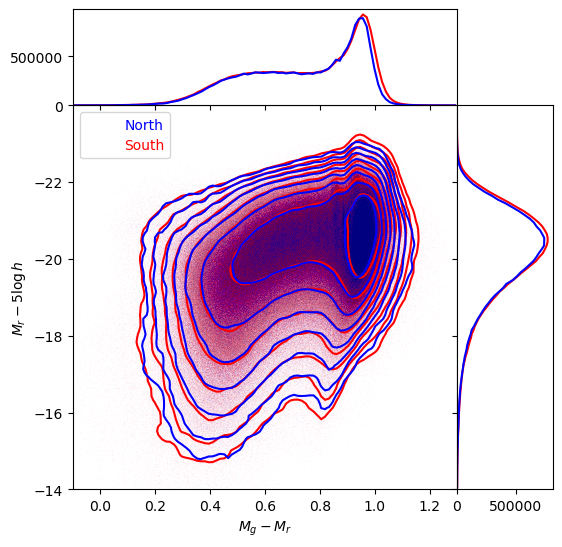

In [19]:
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#ca.plot_col_mag_withvmax(dat,regions)

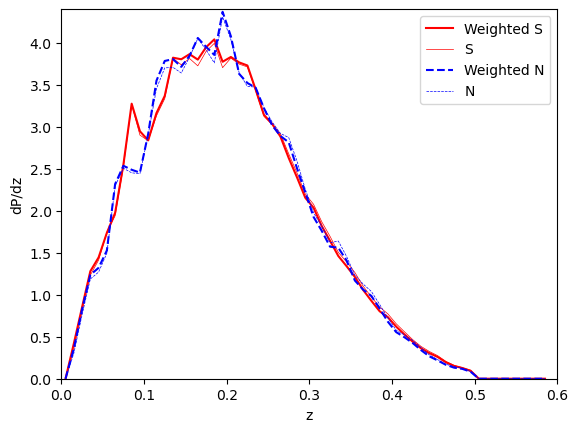

In [20]:
#redshift distribution
ca.hist_nz(dat,regions)

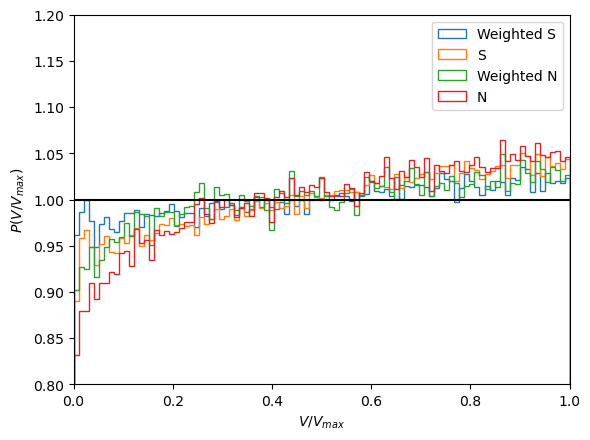

In [21]:
#Plot overall V/Vmax distribution
ca.plot_v_vmax(dat,regions)

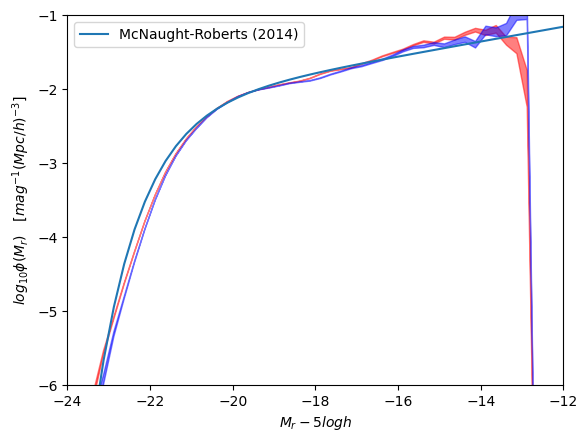

In [22]:
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(dat,regions,ratio=False)